# Spherical Scattering Example 

In [ ]:
import sys
import os

import physicl
import physicl.newton
import physicl.light
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sim = physicl.Simulation(bounds=np.array([1000, 1000, 1000]), cl_on=True, exit=lambda cond: cond.t >= 0.100)

sim.add_objs(physicl.light.generate_photons(10000, bins=100, min=physicl.light.E_from_wavelength(200e-9), max=physicl.light.E_from_wavelength(700e-9)))

sim.add_step(0, physicl.UpdateTimeStep(lambda s: np.double(0.001)))
sim.add_step(1, physicl.newton.NewtonianKinematicsStep())
sim.add_step(2, physicl.light.ScatterSphericalStep(np.double(0.001), np.double(0.001)))
m2 = physicl.light.ScatterSignMeasureStep(None, True)
sim.add_step(4, m2)

sim.start()

while sim.running:
        time.sleep(0.5)
        print(sim.get_state())

{'objects': 10000, 't': 0.001, 'dt': 0.001, 'run_time': 0.5126135349273682}
{'objects': 10000, 't': 0.002, 'dt': 0.001, 'run_time': 1.0250153541564941}
{'objects': 10000, 't': 0.003, 'dt': 0.001, 'run_time': 1.5361888408660889}
{'objects': 10000, 't': 0.004, 'dt': 0.001, 'run_time': 2.082759380340576}
{'objects': 10000, 't': 0.005, 'dt': 0.001, 'run_time': 2.593820333480835}


This simulation works similarly to the deletion simulation. For this, we change the exit condition to `lambda cond: cond.t >= 0.100` so it ends after $0.100$ seconds have been simulated. Then we add `ScatterSphericalStep`, which scatters with the same probability as with `ScatterDeleteStep`, but will instead scatter photons in a random direction.

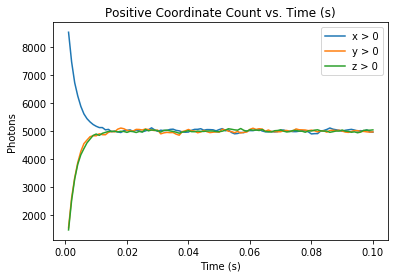

In [5]:
plt.plot(sim.ts, [x[2] for x in m2.data], label="x > 0")
plt.plot(sim.ts, [x[3] for x in m2.data], label="y > 0")
plt.plot(sim.ts, [x[4] for x in m2.data], label="z > 0")
plt.ylabel("Photons")
plt.xlabel("Time (s)")
plt.legend()
plt.title("Positive Coordinate Count vs. Time (s)")

plt.show()

One property of scattering in a random direction will be that the positive and negative signed coordinates will be evenly split for each axis. Since we initialized every ray in the $+x$ direction, we will see it decrease to around $50\%$ of the original photons, while photons with a $+y$ and $+z$ direction will increase to around $50\%$.